In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

#parameters for NGC 5533
gamma = 0
h = 8.9                                                     #radial scale-length (kpc)
rc = 1.4                                                    #core radius (kpc)
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
rho00 = 0.31e9                                              #central surface density (solar mass/kpc^3)

In [2]:
#equations from Casertano's paper
rhat = lambda r,z: np.sqrt((r**2)+(z**2))                   #r-hat from Casertano's eq(9)

rho = lambda r,rho00,rc: rho00*((1+((r/rc)**2))**(-1))      #isothermal density profile
v0h = lambda r,rho00,rc,z,G: np.sqrt(rho(r,rho00,rc)*4*np.pi*G*(rhat(r,z)**2))    #eq 9 Casertano
vh = lambda r,rho00,rc,z,G,gamma: v0h(r,rho00,rc,z,G)*((r/rc)**gamma)             #eq 18 halo velocity from Casertano's paper
#vh = lambda r,rho00,rc,z,G: v0h(r,rho00,rc,z,G)            #eq 10 Casertano

print(rhat(1,1))
print(rho(1,rho00,rc))
print(vh(0.001,rho00,rc,0,G,gamma))

1.4142135623730951
205270270.27027026
0.12942551325967705


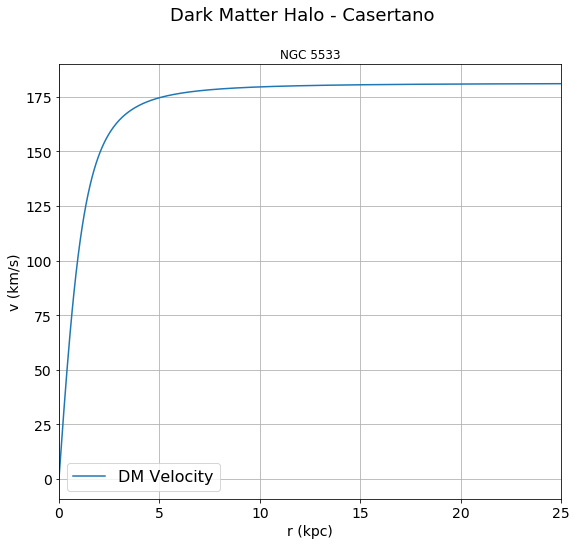

In [3]:
#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0, 25, 500)

plt.plot(r, vh(r,rho00,rc,0,G,gamma), linestyle='solid', label='DM Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Dark Matter Halo - Casertano', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,25)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DMVelocity.png')
plt.show()

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


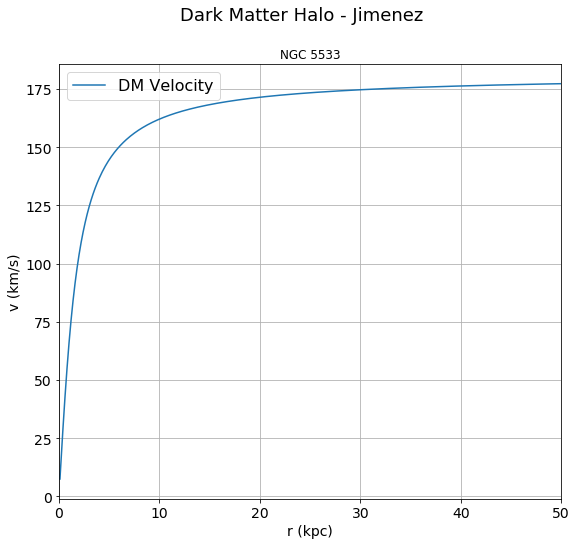

In [4]:
#isothermal density profile
#using a velocity equation from the paper "Dark halo properties from rotation curves" by Jimenez et.al.
vcdm = lambda r: np.sqrt(4*np.pi*G*rho00*(rc**2)*(1-((rc/r)*np.arctan(r/rc))))       #eq 9 from Jimenez paper

#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0, 50, 500)

plt.plot(r, vcdm(r), linestyle='solid', label='DM Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Dark Matter Halo - Jimenez', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,50)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DMVelocity2.png')
plt.show()

In [5]:
#data points
print(r,vcdm(r))

[ 0.          0.1002004   0.2004008   0.3006012   0.4008016   0.501002
  0.6012024   0.70140281  0.80160321  0.90180361  1.00200401  1.10220441
  1.20240481  1.30260521  1.40280561  1.50300601  1.60320641  1.70340681
  1.80360721  1.90380762  2.00400802  2.10420842  2.20440882  2.30460922
  2.40480962  2.50501002  2.60521042  2.70541082  2.80561122  2.90581162
  3.00601202  3.10621242  3.20641283  3.30661323  3.40681363  3.50701403
  3.60721443  3.70741483  3.80761523  3.90781563  4.00801603  4.10821643
  4.20841683  4.30861723  4.40881764  4.50901804  4.60921844  4.70941884
  4.80961924  4.90981964  5.01002004  5.11022044  5.21042084  5.31062124
  5.41082164  5.51102204  5.61122244  5.71142285  5.81162325  5.91182365
  6.01202405  6.11222445  6.21242485  6.31262525  6.41282565  6.51302605
  6.61322645  6.71342685  6.81362725  6.91382766  7.01402806  7.11422846
  7.21442886  7.31462926  7.41482966  7.51503006  7.61523046  7.71543086
  7.81563126  7.91583166  8.01603206  8.11623246  8.2

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


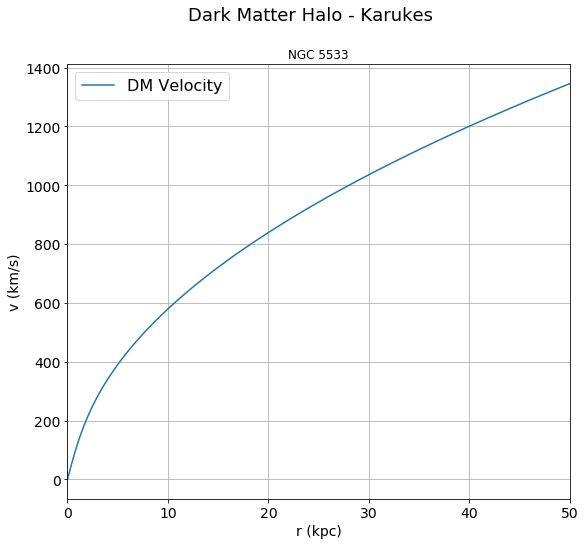

In [6]:
#different density functions and velocity equation by Karukes et.al.

#isothermal density profile
rho = lambda r,rho00,rc: rho00*((1+((r/rc)**2))**(-1))      

#NFW density profile
#rhocrit = 9.3e-18                                           #critical density of the Universe (kg/km^3)
#Mvir = lambda c: (4/3)*np.pi*100*rhocrit*((c*rs)**3)                    #virial mass
#rs = lambda c: (1/c)(((3*Mvir)/((4*np.pi*100*rhocrit)**(1/3))))       #scale radius (kpc)
#Rvir = lambda c: c*rs                                                 #concentration parameter
#rho_s = (100/3)*((c**3)/(np.log(1+c)-(c/(1+c))))*rhocrit    #characteristic density

#rho = lambda rho_s,r,rs: rho_s/((r/rs)((1+r/rs)**2))     

#Section 3.2 in Karukes paper
f = lambda r,R: 4*np.pi*rho(r,rho00,rc)*(R**2)
mdm = lambda R,r: quad(f, 0, r, args=(r,))[0]                 #instead of velocity v(r), I think this is the mass M(r)
vdm2 = lambda r,R: (G*mdm(r,R))/r                             #velocity squared: GM(r)/r)

r = np.linspace(0.01, 50, 500)
R = np.linspace(0.01, 50, 500)

vdm2v = np.vectorize(vdm2)
vdm = np.sqrt(vdm2v(r,R))                                     #velocity: sqrt(GM(r)/r)

#plot orbital velocity for dark matter halo 
fig = plt.figure(figsize=(9.0,8.0))                     #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, vdm, linestyle='solid', label='DM Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Dark Matter Halo - Karukes', fontsize=18)
ax.set(title='NGC 5533')                           #labeling axes
ax.set_xlim(0,50)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                           #adding legend
plt.savefig('DMVelocity3.png')
plt.show()